In [1]:
from supervised_utils import *
import warnings as wrngs

In [2]:
wrngs.filterwarnings('ignore', category=RuntimeWarning)

### Task di regressione su `score`

#### Addestramento e tuning sul dataset originale `movies_v2.csv`

In [3]:
df = pd.read_csv('../dataset/movies_v2.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'year', 'score', 'votes', 'budget', 'gross', 'runtime']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['votes', 'budget', 'gross'],
    'standardize': ['runtime'],
    'minmax': ['year', 'votes', 'budget', 'gross']
}

--------------------------------------------------------------------------------

Training and tuning [Ridge_Regressor]...

Results after GridSearchCV:
Best parameters: {'alpha': 2}
Best score: {'mean_squared_error': 0.5262}


Test score for [Ridge_Regressor]:
MSE: 0.4519
MAE: 0.5084



--------------------------------------------------------------------------------

Training and tuning [Decision_Tree_Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score: {'mean_squared_error': 0.5620}

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'mean_squared_error': 0.5494}



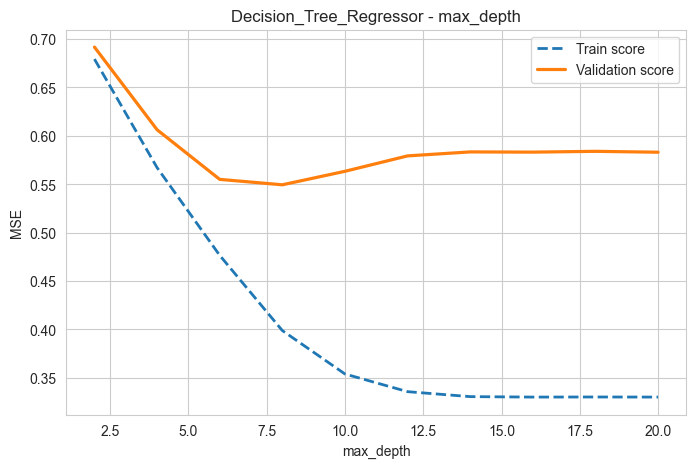


Test score for [Decision_Tree_Regressor]:
MSE: 0.5090
MAE: 0.5359



--------------------------------------------------------------------------------

Training and tuning [Random_Forest_Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score: {'mean_squared_error': 0.4502}

Results after max_depth tuning:
Best parameters: {'max_depth': 10}
Best score: {'mean_squared_error': 0.4510}



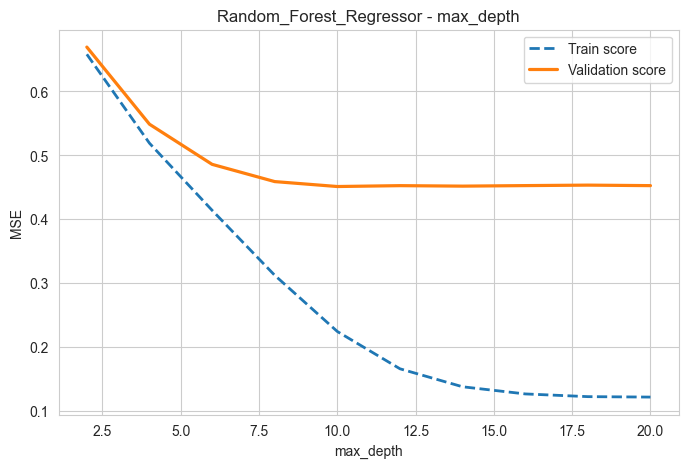

Results after n_estimators tuning:
Best parameters: {'n_estimators': 320}
Best score: {'mean_squared_error': 0.4524}



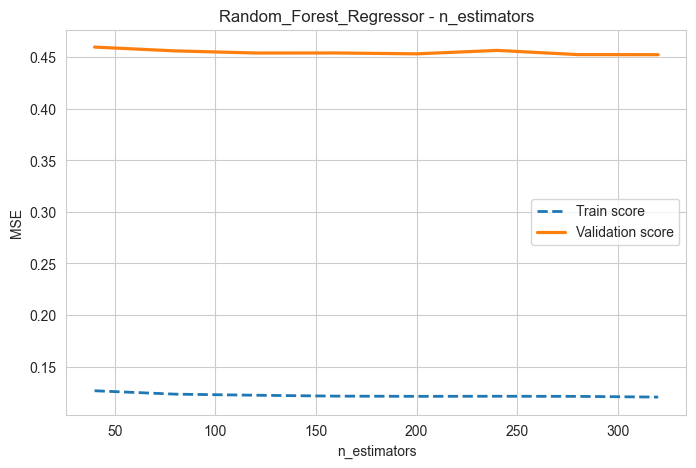


Test score for [Random_Forest_Regressor]:
MSE: 0.3743
MAE: 0.4490



--------------------------------------------------------------------------------

Training and tuning [Gradient_Boosting_Regressor]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 200}
Best score: {'mean_squared_error': 0.4221}

Results after max_depth tuning:
Best parameters: {'max_depth': 4}
Best score: {'mean_squared_error': 0.4224}



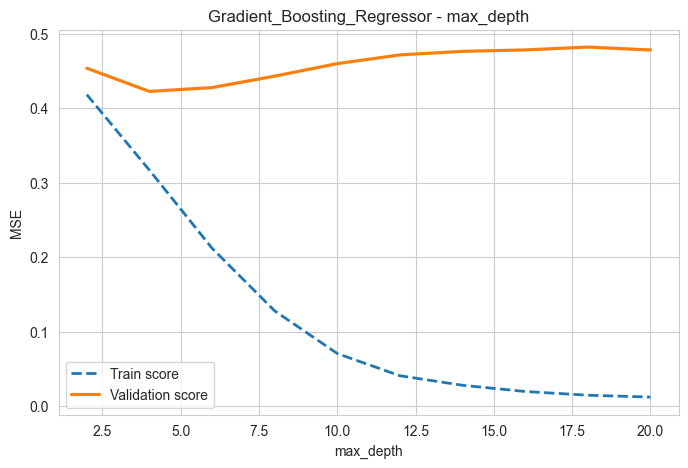

Results after n_estimators tuning:
Best parameters: {'n_estimators': 80}
Best score: {'mean_squared_error': 0.4696}



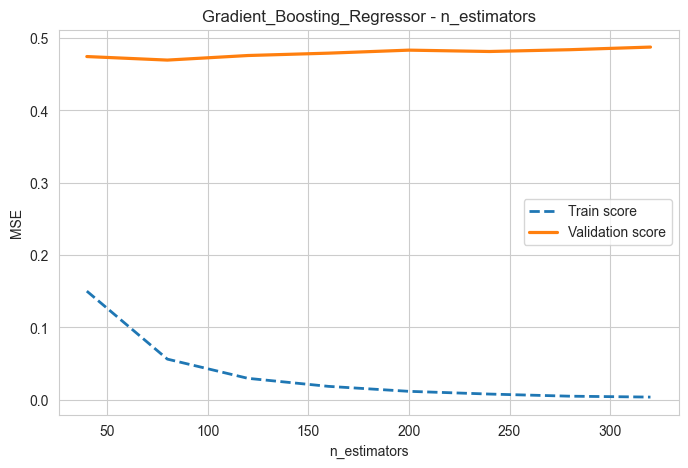


Test score for [Gradient_Boosting_Regressor]:
MSE: 0.3956
MAE: 0.4666





In [4]:
# tuning e testing dei modelli
tune_and_test_models_for_regression(df, cols, session_name='original')

#### Addestramento e tuning sul primo dataset derivato `movies_not_binned.csv`

In [5]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

--------------------------------------------------------------------------------

Training and tuning [Ridge_Regressor]...

Results after GridSearchCV:
Best parameters: {'alpha': 2}
Best score: {'mean_squared_error': 0.5060}


Test score for [Ridge_Regressor]:
MSE: 0.4295
MAE: 0.4954



--------------------------------------------------------------------------------

Training and tuning [Decision_Tree_Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15}
Best score: {'mean_squared_error': 0.5736}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'mean_squared_error': 0.5648}



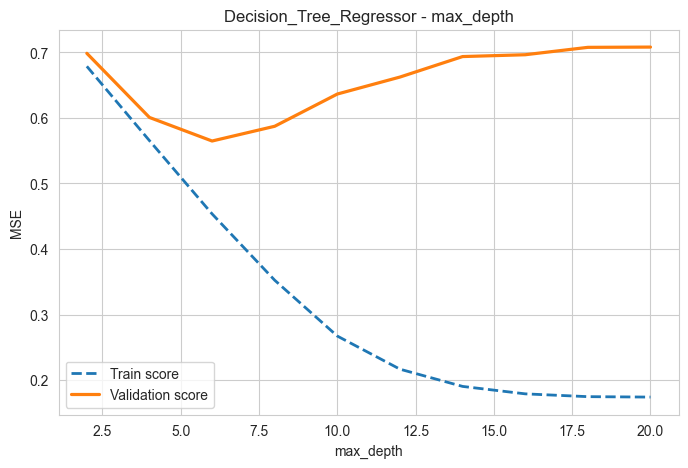


Test score for [Decision_Tree_Regressor]:
MSE: 0.6128
MAE: 0.5953



--------------------------------------------------------------------------------

Training and tuning [Random_Forest_Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.4205}

Results after max_depth tuning:
Best parameters: {'max_depth': 23}
Best score: {'mean_squared_error': 0.4212}



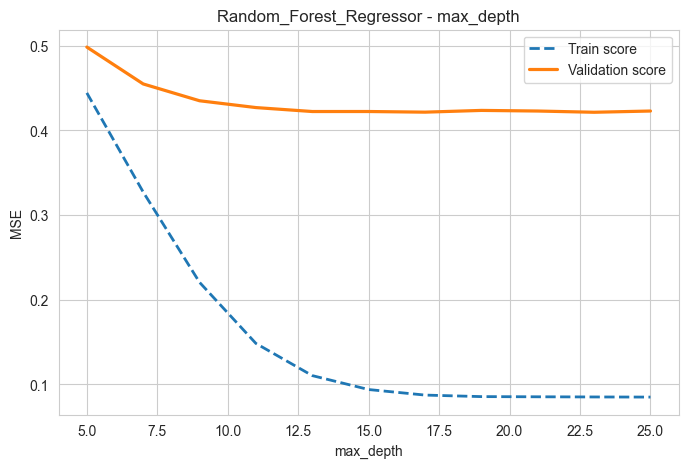

Results after n_estimators tuning:
Best parameters: {'n_estimators': 280}
Best score: {'mean_squared_error': 0.4206}



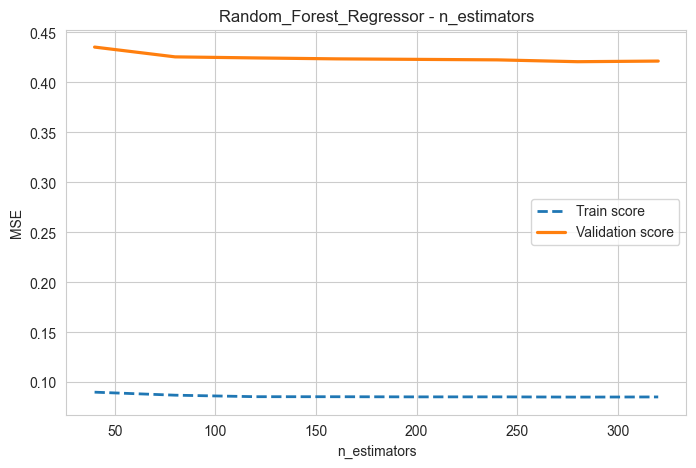


Test score for [Random_Forest_Regressor]:
MSE: 0.3624
MAE: 0.4449



--------------------------------------------------------------------------------

Training and tuning [Gradient_Boosting_Regressor]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.3824}

Results after max_depth tuning:
Best parameters: {'max_depth': 4}
Best score: {'mean_squared_error': 0.3849}



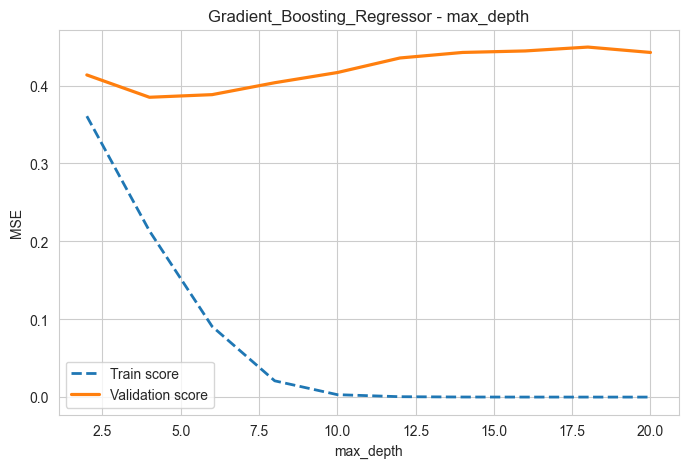

Results after n_estimators tuning:
Best parameters: {'n_estimators': 200}
Best score: {'mean_squared_error': 0.4419}



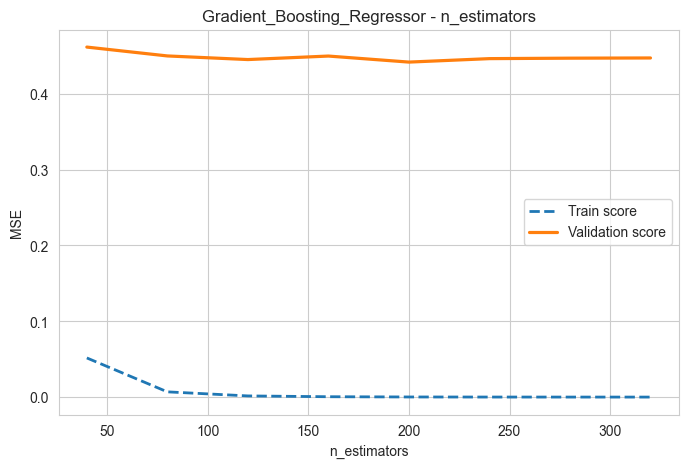


Test score for [Gradient_Boosting_Regressor]:
MSE: 0.3808
MAE: 0.4579





In [6]:
# tuning e testing dei modelli
tune_and_test_models_for_regression(df, cols, session_name='not_binned')

#### Addestramento e tuning sul secondo dataset derivato `movies_binned.csv`

In [7]:
df = pd.read_csv('../dataset/movies_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'score', 'profitability', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre', 'profitability', 'age', 'runtime',
                'votes', 'budget', 'director_age', 'actor_age',
                'director_num_movies', 'actor_num_movies',
                'director_profit_mean', 'actor_profit_mean',
                'director_profit_std', 'actor_profit_std',
                'director_score_mean', 'actor_score_mean',
                'director_score_std', 'actor_score_std'],
    'labels': [],
    'round': [],
    'clipping': [],
    'standardize': [],
    'minmax': []
}

--------------------------------------------------------------------------------

Training and tuning [Ridge_Regressor]...

Results after GridSearchCV:
Best parameters: {'alpha': 2}
Best score: {'mean_squared_error': 0.4918}


Test score for [Ridge_Regressor]:
MSE: 0.4462
MAE: 0.5091



--------------------------------------------------------------------------------

Training and tuning [Decision_Tree_Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 15}
Best score: {'mean_squared_error': 0.6147}

Results after max_depth tuning:
Best parameters: {'max_depth': 10}
Best score: {'mean_squared_error': 0.6158}



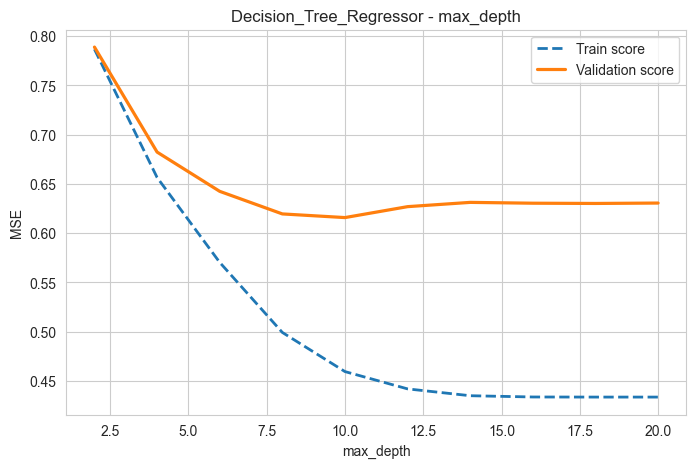


Test score for [Decision_Tree_Regressor]:
MSE: 0.5830
MAE: 0.5984



--------------------------------------------------------------------------------

Training and tuning [Random_Forest_Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.5208}

Results after max_depth tuning:
Best parameters: {'max_depth': 23}
Best score: {'mean_squared_error': 0.5197}



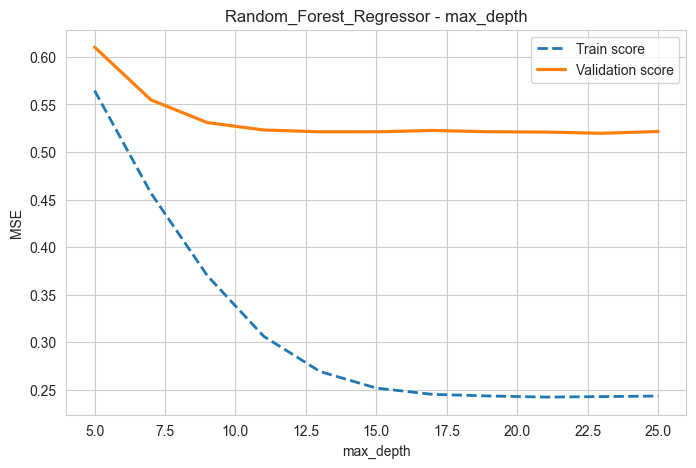

Results after n_estimators tuning:
Best parameters: {'n_estimators': 160}
Best score: {'mean_squared_error': 0.5208}



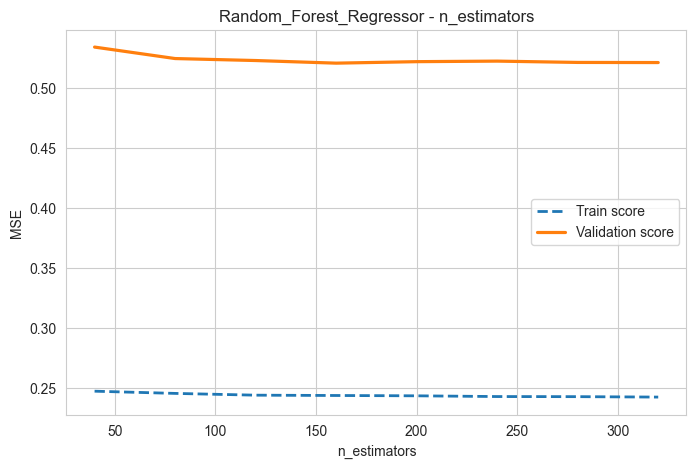


Test score for [Random_Forest_Regressor]:
MSE: 0.4671
MAE: 0.5219



--------------------------------------------------------------------------------

Training and tuning [Gradient_Boosting_Regressor]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score: {'mean_squared_error': 0.4782}

Results after max_depth tuning:
Best parameters: {'max_depth': 4}
Best score: {'mean_squared_error': 0.4812}



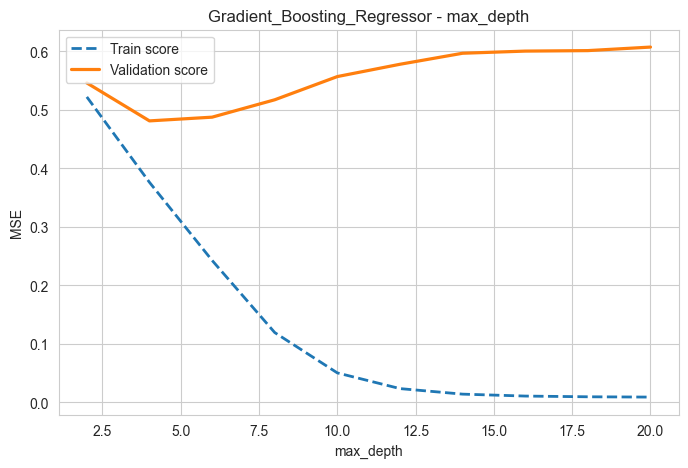

Results after n_estimators tuning:
Best parameters: {'n_estimators': 40}
Best score: {'mean_squared_error': 0.5725}



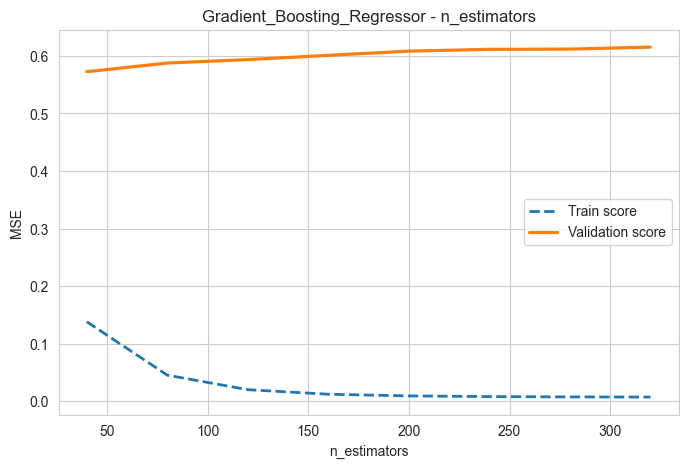


Test score for [Gradient_Boosting_Regressor]:
MSE: 0.5534
MAE: 0.5669





In [8]:
# tuning e testing dei modelli
tune_and_test_models_for_regression(df, cols, session_name='binned')

### Task di classificazione su `profitability`

#### Addestramento e tuning sul primo dataset derivato `movies_not_binned.csv`

In [9]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'profitability', 'cultness', 'age', 'runtime', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'profitability',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['budget', 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['cultness', 'runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'budget', 'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

In [11]:
# tuning e testing dei modelli
tune_and_test_models_for_classification(df, cols, resample=True, session_name='not_binned')

--------------------------------------------------------------------------------

Training and tuning [Logistic_Classifier]...



ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1318, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1339, in _check_y
    y = column_or_1d(y, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1406, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (5452, 3) instead.

--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1318, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1339, in _check_y
    y = column_or_1d(y, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1406, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (5453, 3) instead.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got 'none' instead.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got 'none' instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'l2'} or None. Got 'none' instead.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'elasticnet', 'l1'} or None. Got 'none' instead.


#### Addestramento e tuning sul secondo dataset derivato `movies_binned.csv`

In [ ]:
df = pd.read_csv('../dataset/movies_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'profitability', 'cultness', 'age', 'runtime', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'profitability',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre', 'profitability', 'cultness', 'age', 'runtime',
                'budget', 'director_age', 'actor_age',
                'director_num_movies', 'actor_num_movies',
                'director_profit_mean', 'actor_profit_mean',
                'director_profit_std', 'actor_profit_std',
                'director_score_mean', 'actor_score_mean',
                'director_score_std', 'actor_score_std'],
    'labels': [],
    'round': [],
    'clipping': [],
    'standardize': [],
    'minmax': []
}

In [ ]:
# tuning e testing dei modelli
tune_and_test_models_for_classification(df, cols, resample=True, session_name='binned')